### 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### 1.1. Functions

In [86]:
def determinerMissingValue(datasetToLook):
    return round(100*pd.isnull(datasetToLook).sum()/pd.isnull(datasetToLook).count(),2).sort_values(ascending=False)

def plotHist(dataToPlot,ylabel,title,color):
    y_pos = np.arange(len(dataToPlot))
    plt.figure(figsize=(15,5))
    plt.bar(y_pos, dataToPlot, align='center', alpha=0.5,color=color)
    plt.xticks(y_pos, dataToPlot.index,rotation='90')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
def plotCurb(dataToPlot,colPlot,title):
    y_pos = dataToPlot.index
    plt.figure(figsize=(5,5))
    for x in colPlot:
        plt.plot(y_pos, dataToPlot[x], label=x)
        plt.title(title)
    plt.legend()
    plt.show()
    
def timeOfDay(hourmn):
    hourmn=str(hourmn)
    hourmn='0'*(4-len(hourmn))+hourmn
    hourmn=hourmn[0:2]
    hour=int(hourmn)
    timeDay="Night"
    if hour<=12 and hour>=4:
        timeDay="Morning"
    elif  hour<=18 and hour>=13:
        timeDay="After Noon"
    elif  hour<=22 and hour>=19:
        timeDay="Evening"
    return timeDay

def conditionalCorr(corrTab,treeshold):
    for x in corrTab.index:
        if abs(corrTab.loc['grav',x])<treeshold:
            new_range=corrTab[corrTab.index!=x].index
            corrTab=corrTab.loc[new_range,new_range]
    return corrTab

### 2. Import data

In [3]:
# 2.1. Datas
places=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\places.csv',low_memory=False)
users=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\users.csv',low_memory=False)
vehicles=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\vehicles.csv',low_memory=False)
caracteristics=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\caracteristics.csv',low_memory=False, encoding = 'latin-1')
holidays=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\holidays.csv',low_memory=False)

# 2.2. Merging places and caracteristics to obtain accidents

accidents=pd.merge(caracteristics,places)
users=pd.merge(users,accidents)
vehicles=pd.merge(vehicles,accidents)
# 2.3. Data names
places.name="places"
users.name="users"
vehicles.name="vehicles"
caracteristics.name="caracteristics"
holidays.name="holidays"
accidents.name="accidents"

In [4]:
# 2.4. Attribute labels

dictAccidents=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\accidentsMod.csv',low_memory=False)
dictUsers=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\usersMod.csv',low_memory=False)
dictVehicles=pd.read_csv(r'C:\Users\savad\OneDrive\Desktop\Data Science TII\Write a Blog\accident in france\Data\vehiclesMod.csv',low_memory=False)

### 3. Exploring data

In [5]:
missingPlaces=determinerMissingValue(places)
missingUsers=determinerMissingValue(users)
missingVehicles=determinerMissingValue(vehicles)
missingCaracteristics=determinerMissingValue(caracteristics)
missingAccidents=determinerMissingValue(accidents)

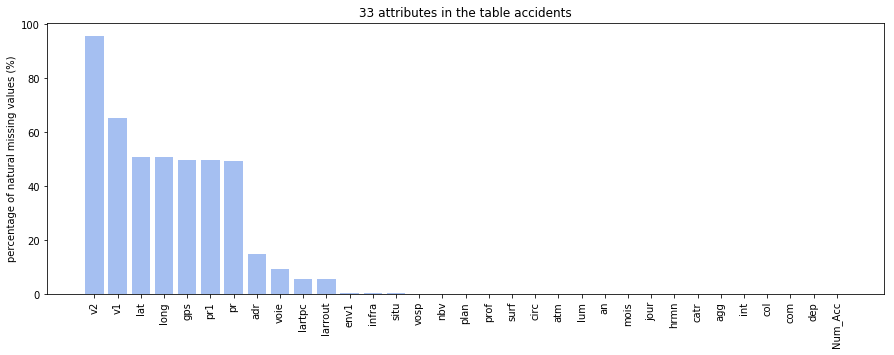

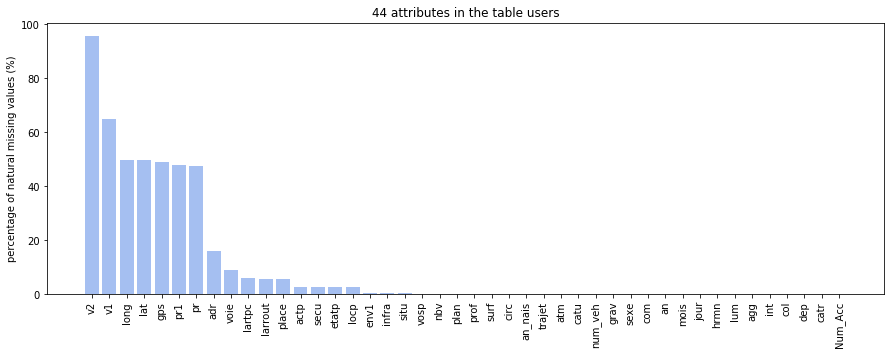

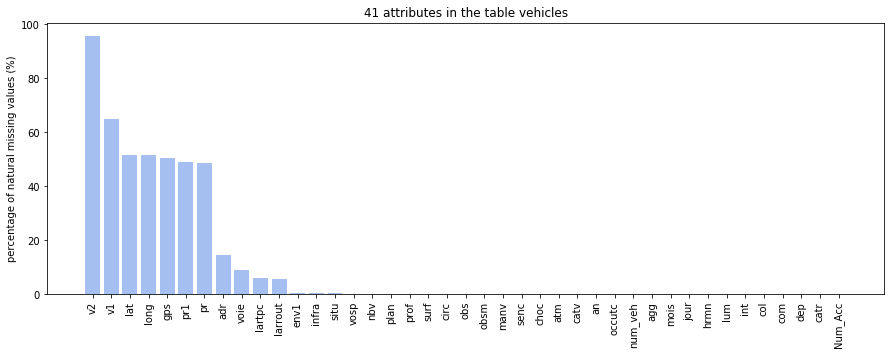

In [6]:
plotHist(missingAccidents,'percentage of natural missing values (%)','{} attributes in the table {}'.format(missingAccidents.count(),accidents.name),['#4d80e4'])
plotHist(missingUsers,'percentage of natural missing values (%)','{} attributes in the table {}'.format(missingUsers.count(),users.name),'#4d80e4')
plotHist(missingVehicles,'percentage of natural missing values (%)','{} attributes in the table {}'.format(missingVehicles.count(),vehicles.name),'#4d80e4')

### 3.1. Trends between 2005 and 2018

In [7]:
dictUsers[dictUsers["var"]=="grav"]

,var,var_label,mod,mod_label
7,grav,Severity of the accident: The injured users ar...,1.0,Unscathed
8,grav,Severity of the accident: The injured users ar...,2.0,Killed
9,grav,Severity of the accident: The injured users ar...,3.0,Hospitalized wounded
10,grav,Severity of the accident: The injured users ar...,4.0,Light injury


In [8]:
#number of accidents per year
accidentsPerYear=accidents.groupby(["an"]).count()[['Num_Acc']]
accidentsPerYear.columns=["accidents"]
#number of persons involved in accidents
involvedPerYear=users.groupby(["an"]).count()[['Num_Acc']]
involvedPerYear.columns=["involved"]
#number of persons killed in accidents
killedPerYear=users[users["grav"]==2].groupby(["an"]).count()[['Num_Acc']]
killedPerYear.columns=["killed"]
#number of persons wounded in accidents
woundedPerYear=users[users["grav"]==3].groupby(["an"]).count()[['Num_Acc']]
woundedPerYear.columns=["wounded"]
#number of persons unscathed in accidents
unscathedPerYear=users[users["grav"]==1].groupby(["an"]).count()[['Num_Acc']]
unscathedPerYear.columns=["unscathed"]
#number of persons light injury in accidents
lightInjuryPerYear=users[users["grav"]==4].groupby(["an"]).count()[['Num_Acc']]
lightInjuryPerYear.columns=["lightInjury"]

#merging historical accidents
statAccidents=accidentsPerYear.join(involvedPerYear, how='outer')
statAccidents=statAccidents.join(killedPerYear, how='outer')
statAccidents=statAccidents.join(woundedPerYear, how='outer')
statAccidents=statAccidents.join(unscathedPerYear, how='outer')
statAccidents=statAccidents.join(lightInjuryPerYear, how='outer')
statAccidents.index=statAccidents.index+2000

In [9]:
statAccidents.to_csv("statsAccidents.csv")

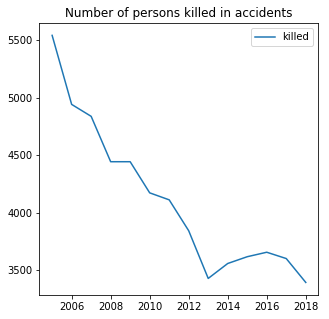

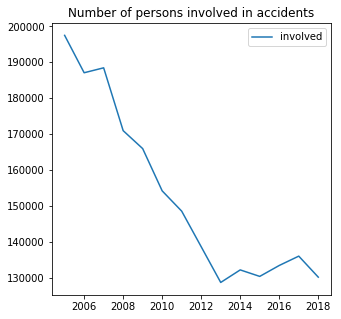

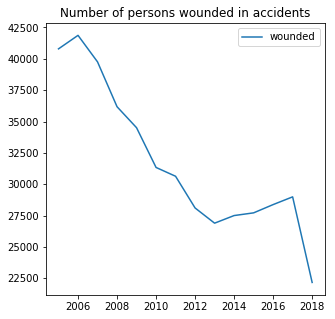

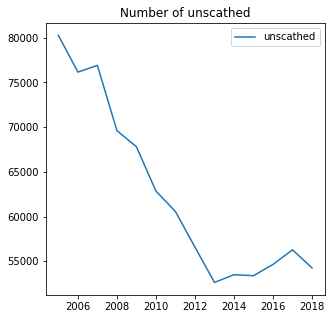

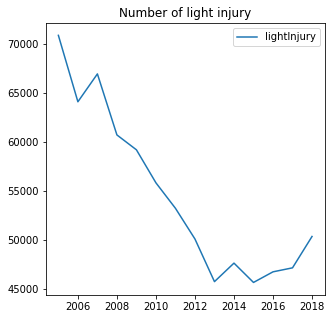

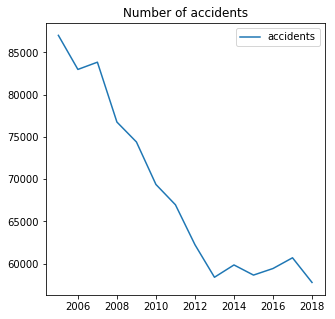

In [10]:
plotCurb(statAccidents,["killed"],"Number of persons killed in accidents")
plotCurb(statAccidents,["involved"],"Number of persons involved in accidents")
plotCurb(statAccidents,["wounded"],"Number of persons wounded in accidents")
plotCurb(statAccidents,["unscathed"],"Number of unscathed")
plotCurb(statAccidents,["lightInjury"],"Number of light injury")
plotCurb(statAccidents,["accidents"],"Number of accidents")

In [11]:
#number of accidents
evolutionAccPerDepartments=accidents.groupby(["dep","an"]).count()[['Num_Acc']]
evolutionAccPerDepartments.columns=["accidents"]
#number of killeds
evolutionKillPerDepartments=users[users["grav"]==2].groupby(["dep","an"]).count()[['Num_Acc']]
evolutionKillPerDepartments.columns=["killed"]
evolPerDepartement=evolutionAccPerDepartments.join(evolutionKillPerDepartments, how='outer')

In [12]:
evolPerDepartement.to_csv('evolutionPerDepartments.csv')

#### 3.2. Factors Influencing the occurence of accidents on the road

In [13]:
# Data to use
accidents2018=accidents[accidents['an']==18]
users2018=users[users['an']==18]
vehicles2018=vehicles[vehicles['an']==18]

In [14]:
#define time of day from hrmn
accidents2018['timeOfDay']=[timeOfDay(x) for x in accidents2018["hrmn"]]
users2018['timeOfDay']=[timeOfDay(x) for x in users2018["hrmn"]]
vehicles2018['timeOfDay']=[timeOfDay(x) for x in vehicles2018["hrmn"]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [15]:
accidents2018['isHoliday']='usual day'
for x in holidays.index:
    mois=holidays.loc[x,'month']
    jour=holidays.loc[x,'day']
    fete=holidays.loc[x,'holiday']
    indexConsider=accidents2018[accidents2018['mois']==mois][accidents2018[accidents2018['mois']==mois]['jour']==jour].index
    accidents2018.loc[indexConsider,['isHoliday']]=fete

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
#to analyse
categorical = ['lum', 'agg', 'atm', 'catr', 'surf','prof','int','isHoliday','timeOfDay']

In [17]:
accidents2018ToAnalyse=accidents2018[categorical].dropna()

In [18]:
for x in categorical:
    if x!='timeOfDay' and x!='isHoliday':
        tempo=dictAccidents[dictAccidents['var']==x]
        tempo['mod']=tempo['mod'].astype(int)
        accidents2018ToAnalyse[x]=['other' if tempo[tempo['mod']==int(y)].shape[0]==0 else tempo[tempo['mod']==int(y)].loc[tempo[tempo['mod']==int(y)].index[0],'mod_label'] for y in accidents2018ToAnalyse[x]]
        
    print(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


lum
agg
atm
catr
surf
prof
int
isHoliday
timeOfDay


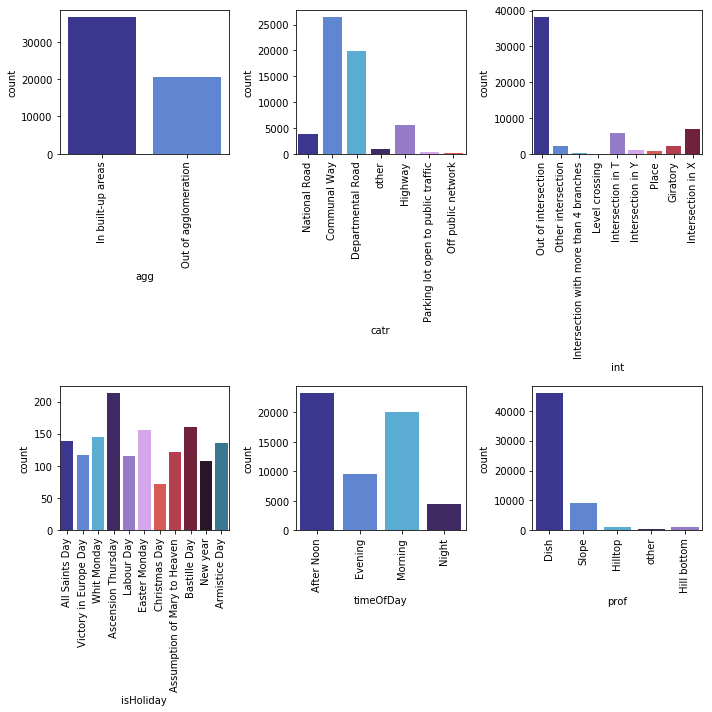

In [19]:
categorical = ['agg', 'catr','int','isHoliday','timeOfDay','prof']
coloring = ["#2e279d","#4d80e4","#46b3e6","#3e206d","#916dd5","#d89cf6","#ee4540","#c72c41","#801336","#2d132c","#297ca0","#ff7315"]
sns.set_palette(coloring) 
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    if variable=='isHoliday':
        dataTemp=accidents2018ToAnalyse[accidents2018ToAnalyse[variable]!='usual day'][variable]
    else:
        dataTemp=accidents2018ToAnalyse[variable]
    sns.countplot(dataTemp, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout() 

In [20]:
dictAccidents[dictAccidents['var']=='prof']

,var,var_label,mod,mod_label
65,prof,Longitudinal profile describes the gradient of...,1,Dish
66,prof,Longitudinal profile describes the gradient of...,2,Slope
67,prof,Longitudinal profile describes the gradient of...,3,Hilltop
68,prof,Longitudinal profile describes the gradient of...,4,Hill bottom


### Risk factors for fatalities in accidents on the road

In [21]:
#Analyse based on passengers or drivers (pedestrians excluded)
users2018ToAnalyse=users2018[['Num_Acc', 'catu', 'grav', 'sexe','timeOfDay', 'trajet', 'secu', 'an_nais', 'num_veh',
       'lum', 'agg', 'int', 'atm', 'col','dep', 'catr',
        'prof', 'surf']]

users2018ToAnalyse=users2018ToAnalyse[users2018ToAnalyse['catu']<=2]

#Missin values
missingUsers2018=determinerMissingValue(users2018ToAnalyse)
print(missingUsers2018)

#Deleting missing values
users2018ToAnalyse=users2018ToAnalyse.dropna()

#Re-encode severity of injury to 1 when killed and 0 otherwise
users2018ToAnalyse.loc[users2018ToAnalyse[users2018ToAnalyse['grav']!=2].index,'grav']="survived"
users2018ToAnalyse.loc[users2018ToAnalyse[users2018ToAnalyse['grav']==2].index,'grav']="died"
#Secu is a combine variable, re-encode it
users2018ToAnalyse['secuExist']=(users2018ToAnalyse['secu']/10).astype(int)
users2018ToAnalyse['secuUsed']=users2018ToAnalyse['secu']%10
#put 0 in secuExist into 9
users2018ToAnalyse.loc[users2018ToAnalyse[users2018ToAnalyse['secuExist']==0].index,'secuExist']=9
#Attributes Labels
attributsToLabel=['catu', 'sexe', 'trajet', 'secuExist','secuUsed',
       'lum', 'agg', 'int', 'atm', 'col', 'catr','prof', 'surf']
for x in attributsToLabel:
    tempo=dictAccidents[dictAccidents['var']==x]
    if x=='Driver_sex':
        tempo=dictAccidents[dictAccidents['var']=='Driver_sex']
    if len(tempo)==0:
        tempo=dictUsers[dictUsers['var']==x]
    tempo['mod']=tempo['mod'].astype(int)
    users2018ToAnalyse[x]=['other' if tempo[tempo['mod']==int(y)].shape[0]==0 else tempo[tempo['mod']==int(y)].loc[tempo[tempo['mod']==int(y)].index[0],'mod_label'] for y in users2018ToAnalyse[x]]
    print(x)
    

surf         0.80
prof         0.78
trajet       0.09
secu         0.08
an_nais      0.03
col          0.01
atm          0.01
catu         0.00
grav         0.00
sexe         0.00
timeOfDay    0.00
num_veh      0.00
lum          0.00
agg          0.00
int          0.00
dep          0.00
catr         0.00
Num_Acc      0.00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


catu
sexe
trajet
secuExist
secuUsed
lum
agg
int
atm
col
catr
prof
surf


In [22]:
#Missin values
missingUsers2018=determinerMissingValue(users2018ToAnalyse)
print(missingUsers2018)

#Deleting missing values
users2018ToAnalyse=users2018ToAnalyse.dropna()

users2018ToAnalyse.shape

secuUsed     0.0
secuExist    0.0
catu         0.0
grav         0.0
sexe         0.0
timeOfDay    0.0
trajet       0.0
secu         0.0
an_nais      0.0
num_veh      0.0
lum          0.0
agg          0.0
int          0.0
atm          0.0
col          0.0
dep          0.0
catr         0.0
prof         0.0
surf         0.0
Num_Acc      0.0
dtype: float64


(118019, 20)

In [23]:
#add age and ID
users2018ToAnalyse['age']=2018-users2018ToAnalyse['an_nais']
users2018ToAnalyse['ID']=users2018ToAnalyse['Num_Acc'].astype(str) + '-' + users2018ToAnalyse['num_veh']

#Create drivers table
drivers=users2018ToAnalyse[users2018ToAnalyse['catu']=='Driver'][['ID','sexe','age']]
drivers.columns=['ID','Driver_sex','Driver_age']
drivers.shape

(95091, 3)

In [24]:
users2018ToEtape0=pd.merge(drivers,users2018ToAnalyse,how='outer',on="ID")
users2018ToEtape0.head()

,ID,Driver_sex,Driver_age,Num_Acc,catu,grav,sexe,timeOfDay,trajet,secu,...,int,atm,col,dep,catr,prof,surf,secuExist,secuUsed,age
0,201800057783-A01,Female,28.0,201800057783,Driver,0,Female,After Noon,Other,11.0,...,Out of intersection,Normal,Two vehicles - frontal,976,National Road,Dish,normal,Belt,Yes,28.0
1,201800057783-B01,Male,45.0,201800057783,Driver,0,Male,After Noon,Other,11.0,...,Out of intersection,Normal,Two vehicles - frontal,976,National Road,Dish,normal,Belt,Yes,45.0
2,201800057782-B01,Male,44.0,201800057782,Driver,0,Male,Evening,Other,21.0,...,Out of intersection,Normal,Two vehicles - frontal,976,Communal Way,Slope,normal,Helmet,Yes,44.0
3,201800057782-A01,Female,25.0,201800057782,Driver,0,Female,Evening,Other,11.0,...,Out of intersection,Normal,Two vehicles - frontal,976,Communal Way,Slope,normal,Belt,Yes,25.0
4,201800057781-A01,Male,29.0,201800057781,Driver,0,Male,Evening,Other,11.0,...,Out of intersection,Normal,Other collision,976,National Road,Dish,normal,Belt,Yes,29.0


In [25]:
#Missin values
missingUsers2018=determinerMissingValue(users2018ToEtape0)
print(missingUsers2018)

#Deleting missing values
users2018ToEtape0=users2018ToEtape0.dropna()
users2018ToEtape0.shape

Driver_sex    0.19
Driver_age    0.19
age           0.00
secuUsed      0.00
Num_Acc       0.00
catu          0.00
grav          0.00
sexe          0.00
timeOfDay     0.00
trajet        0.00
secu          0.00
an_nais       0.00
num_veh       0.00
lum           0.00
agg           0.00
int           0.00
atm           0.00
col           0.00
dep           0.00
catr          0.00
prof          0.00
surf          0.00
secuExist     0.00
ID            0.00
dtype: float64


(117794, 24)

In [139]:
users2018fin=users2018ToEtape0[['grav','Driver_sex', 'Driver_age', 'catu','timeOfDay', 'lum', 'agg',
       'int', 'atm', 'col', 'catr', 'prof', 'surf','secuUsed']]

In [140]:
users2018finHotEncoded=pd.get_dummies(users2018fin)

In [141]:
users2018Corr=users2018finHotEncoded.corr()

In [108]:
users2018Corr.shape

(66, 66)

In [120]:
conditionalCorr(users2018Corr,0.035).shape

(15, 15)

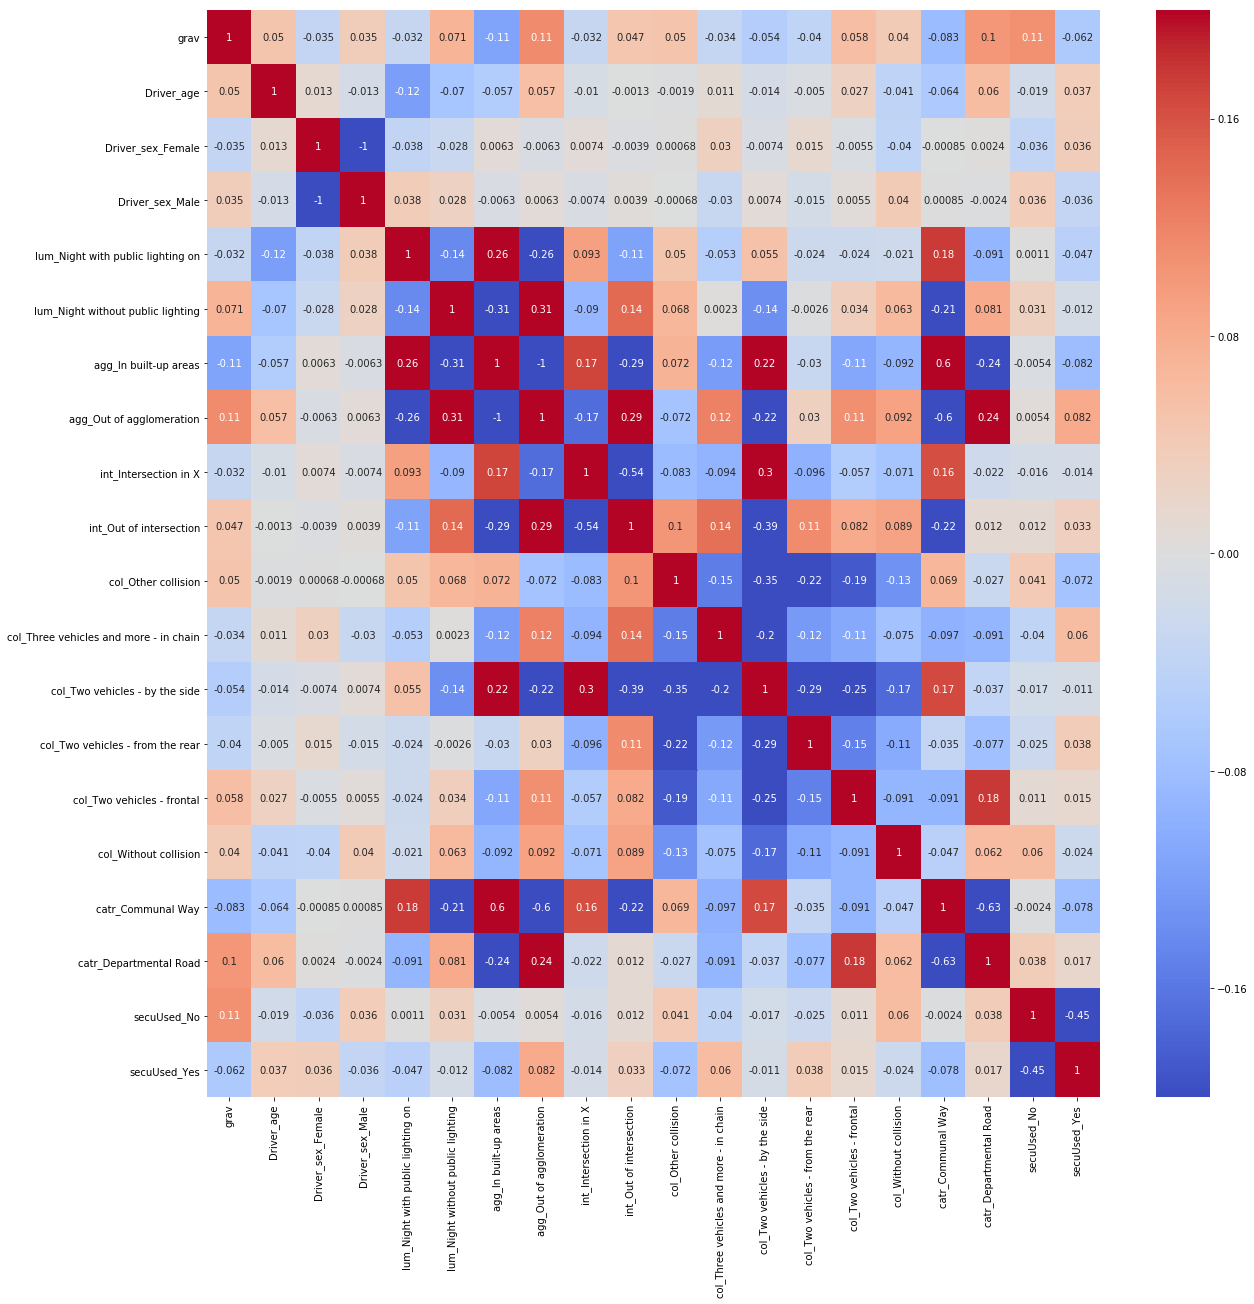

In [143]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(conditionalCorr(users2018Corr,0.03), center=0, annot=True,cmap= 'coolwarm',vmin=-0.2, vmax=0.2)